# Tarea 1 Métodos Lineales para regresión
---
## Integrantes: 
- *José Eduardo Caimapo* -  email@sansano.usm.cl - 201xxxxxx-x
- *Rodrigo Sepúlveda* - rodrigo.sepulveda.12@sansano.usm.cl - 201204766-8

# 1. Regresión lineal ordinaria
En la siguiente sección se centra en estudiar las regresiones lineales ordinarias, para esto se utilizará el conjunto de datos “House Sales in King County, USA”, presentado en la plataforma Kaggle, el cual se compone de 21613 registros de casas vendidas en el condado de King, incluyendo Seattle, entre mayo del 2014 y mayo del 2015, el conjunto de datos incluye información de las casas y su precio. El objetivo de estudiar este conjunto de datos es predecir el valor de una vivienda de acuerdo con sus características.

In [22]:
# Imports 
import pandas               as pd
import matplotlib.pyplot    as plt
import numpy                as np
import sklearn.linear_model as lm

from sklearn.metrics       import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

## a) Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó
Se procede a construir un dataframe con los elementos del conjunto de datos, 	además se eliminan las columnas que no aportan información relevante al problema, entre estas el identificador de cada registro, la fecha en que vendió la casa,  el zipcode. Además, se muestran los primeros 5 registros del conjunto de datos. 

In [14]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id', 'date', 'zipcode',], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## b) Describa brevemente el dataset a utilizar
A continuación, se procede a describir la información del conjunto de datos:

In [15]:
df.shape

(21613, 18)

El conjunto de datos se compone de 21613 filas las cuales corresponden a los registros de la casas vendidas y 18 columnas las cuales corresponden a los distintos atributos o cualidades presentes en el conjunto de datos incluyéndose el precio de cada casa, siendo este la variable a predecir. 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


De las columnas del conjunto de datos es posible apreciar que ninguna presenta valores faltantes, y cada columna corresponde a:
- price: Precio de la casa, variable a predecir. 
- bedrooms: Número de habitaciones por casa.
- bathrooms: Número de baños por cada habitación.
- sqft_living: Pies cuadrados de la casa.
- sqft_lot: Pies cuadrados del terreno.
- floors: Cantidad de pisos en la casa.
- waterfront: Si la casa tiene vista a la costa.
- view: Si fue vista.
- condition: Qué tan buena es la condición (en general)
- grade: Grado general dado a la unidad de vivienda, basado en el sistema de clasificación del condado de King
- sqft_above: Metros cuadrados de la casa aparte del sótano.
- sqft_basement: Metros cuadrados del sótano
- yr_built: Año de construcción. 
- yr_renovated: Año de renovación de la casa.
- lat: Coordenada de Latitud.
- long: Coordenada de Longitud.
- sqft_living15: Área de la sala de estar en el 2015.
- sqft_lot15: Área del lotSize en el 2015.




In [17]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


De los estadísticos presentados para cada columna, es posible apreciar que todas las columnas poseen un valor diferente, y en distintas magnitudes, para el promedio y la desviación estándar. Además, se observa que cada columna presenta su propia escala, produciendo grandes diferencias entre los distintos atributos. Finalmente es posible apreciar que los atributos que no aplican para cada columna se representan con un cero, es decir si una casa no se ha remodelado el valor para el año de remodelación es 0, y así para cada atributo que no aplique en cada registro. 

## c) Normalice los datos antes de trabajar y aplique una trasformación adecuada a la variable a predecir. Explique la importancia/conveniencia de realizar estas dos operaciones.

Antes de determinar la regresión lineal ordinaria es necesario normalizar los datos, es decir hacer que las características de los datos tengan media cero y varianza unitaria. 

El normalizar o estandarización de los datos es requerimiento común en muchos métodos de aprendizaje automático, en especial de una LSS donde los supuestos consisten en que las características de los datos poseen media cero y varianza unitaria. Si se entrena una LSS con un conjunto de datos no estandarizado/normalizado es de esperar que el resultado obtenido sea malo.  Además, los regularizadores, como el l1 y l2, azumen que las características están centradas en el cero y que las varianzas están en la misma magnitud, si las características poseen varianzas en distintas magnitudes, las de mayor magnitud predominaran en la función objetivo haciendo que el modelo no sea capaz de aprender otras características como se esperaría. 


Finalmente se aplica una trasformación a la variable estudiada para que esta posea un comportamiento lineal y así poder ser estimada correctamente por el modelo a generar.

In [35]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])
df_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,13.047817,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,1.482989e-15,1.853096e-15,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,4.348961e-15,-3.446807e-14,-3.637898e-14,-1.506632e-16,1.235382e-16
std,0.526685,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,11.225243,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,12.682152,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,13.017003,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,13.377006,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,15.856731,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


Después de normalizar el conjunto de datos, se aprecia que las medias de las características son casi iguales a cero, y las varianzas son casi iguales a uno.

In [31]:
def set_style(axarr, lx, ly, title):
    axarr.set_xlabel(lx)
    axarr.set_ylabel(ly)
    axarr.set_title(title)
    axarr.grid(True)

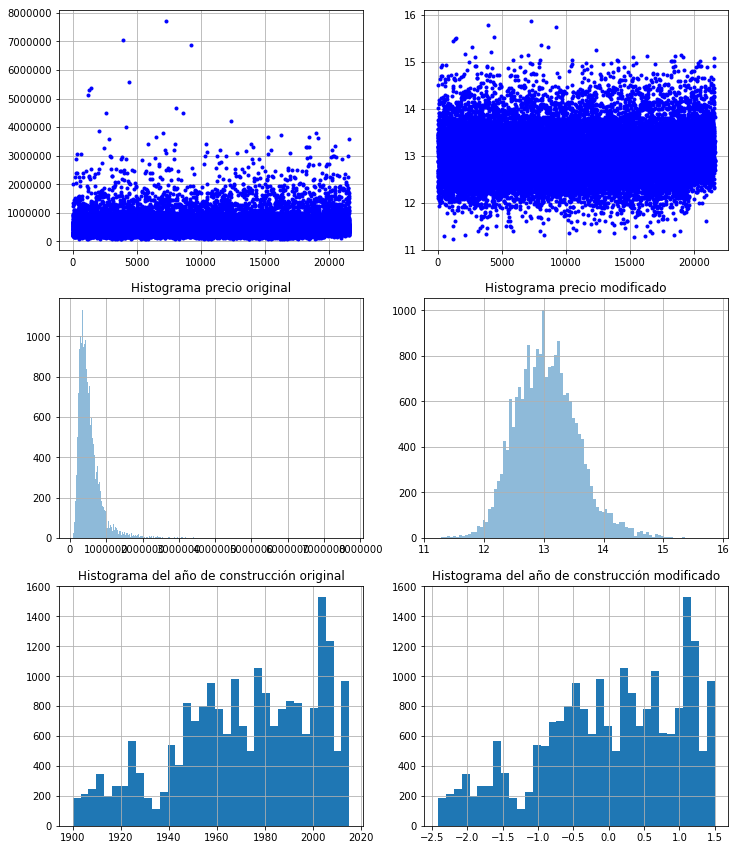

In [41]:
f, axarr = plt.subplots(3, 2,figsize=(12,15))

axarr[0, 0].plot(df['price'], 'b.')
set_style(axarr[0,0], '', '', '')

axarr[0, 1].plot(df_scaled['price'], 'b.')
set_style(axarr[0,1], '', '', '')

axarr[1, 0].hist(df['price'], bins='auto', alpha=0.5)
set_style(axarr[1,0], '', '', 'Histograma precio original')

axarr[1, 1].hist(df_scaled['price'], bins='auto', alpha=0.5)
set_style(axarr[1,1], '', '', 'Histograma precio modificado')

axarr[2, 0].hist(df['yr_built'], bins='auto')
set_style(axarr[2,0], '', '', u'Histograma del año de construcción original')

axarr[2, 1].hist(df_scaled['yr_built'], bins='auto')
set_style(axarr[2,1], '', '', u'Histograma del año de construcción modificado')

plt.show()

De los gráficos del precio antes y después de realizar la normalización se aprecia que la escala del precio se modifica drásticamente a una de menor amplitud donde la distribución de registros presenta una mayor homogeneidad, es decir no se aprecian grandes distancias entre los distintos valores. De los histogramas del año de construcción se aprecia que la normalización de los datos no afecto la distribución original de estos, solo modifico la media y la varianza.

## d) Realice una regresiónlineal de mínimos cuadrados básica. Explique la importancia/conveniencia del paso 4 y los argumentos que se deben entregar a la funcion que implementa la regresión lineal.

In [5]:
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']#mascara estatica con el 70% de los datos
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [6]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,intercept
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715,1.0
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868,1.0
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375,1.0
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522,1.0
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849,1.0


Tabla de pesos Z-score

In [7]:
ypred = linreg.predict(Xtest)
print("Mean squared error: %.2f"
      % mean_squared_error(ytest,ypred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred))

Mean squared error: 0.07
Variance score: 0.76


## e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor. ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

In [8]:
X_m = Xtrain.as_matrix()
vj = np.diag(np.linalg.inv(X_m.T.dot(X_m)))
beta_est = linreg.coef_
sigma_est = np.sqrt(np.mean( (ypred - ytest)**2))

Zscore = beta_est/(sigma_est*np.sqrt(vj))
Zscore

C:\Users\tres1\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


array([ -3.01865620e+00,   1.45815225e+01,              nan,
         7.55886812e+00,   1.22075132e+01,   1.47105290e+01,
         1.73022959e+01,   2.04324161e+01,   4.78238316e+01,
                    nan,              nan,  -3.36187772e+01,
         6.85476191e+00,   8.53589478e+01,  -1.58180027e+00,
         2.34488408e+01,  -2.33484989e+00,   6.18879424e+03])

In [9]:
vj

array([  1.15008239e-04,   2.25685494e-04,  -8.36131868e+10,
         1.31693286e-04,   1.45329726e-04,   7.95928908e-05,
         9.06468643e-05,   7.52435192e-05,   2.32319926e-04,
        -6.79717504e+10,  -1.94153931e+10,   1.63679249e-04,
         7.14145385e-05,   7.29759531e-05,   1.01906417e-04,
         2.05793568e-04,   1.38230362e-04,   6.80268750e-05])

In [10]:
linreg.coef_

array([ -8.26987934e-03,   5.59597464e-02,   5.77687964e-02,
         2.21594833e-02,   3.75946006e-02,   3.35263653e-02,
         4.20824650e-02,   4.52767575e-02,   1.86212419e-01,
         4.71301183e-02,   3.16990298e-02,  -1.09875223e-01,
         1.47981265e-02,   1.86277321e-01,  -4.07918551e-03,
         8.59326727e-02,  -7.01264301e-03,   1.30396924e+01])

## f) Propornga un método para corregir lo observado. Verifíquelo mediante los Z-score presentados en la pregunta anterior.

****Como disernir sobre el z score ****

**2. Selección de Atributos **

Forward Step-wise Selection

In [11]:
def fss(x, y, names_x, k = 10000):
	p = x.shape[1]-1
	k = min(p, k)
	names_x = np.array(names_x)
	remaining = range(0, p)
	selected = [p]
	current_score = best_new_score = 0.0
	while remaining and len(selected)<=k :
		score_candidates = []
		for candidate in remaining:
			model = lm.LinearRegression(fit_intercept=False)
			indexes = selected + [candidate]
			x_train = x[:,indexes]
			predictions_train = model.fit(x_train, y).predict(x_train)
			residuals_train = predictions_train - y
			mse_candidate = np.mean(np.power(residuals_train, 2))
			score_candidates.append((mse_candidate, candidate))
		score_candidates.sort()
		score_candidates[:] = score_candidates[::-1]
		best_new_score, best_candidate = score_candidates.pop()
		remaining.remove(best_candidate)
		selected.append(best_candidate)
		print "selected = %s ..."%names_x[best_candidate]
		print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
	return selected

In [12]:
names_regressors = X.columns[:-1] #without intercept
fss(Xm,ym,names_regressors)

NameError: name 'Xm' is not defined

**3. Regularización**